<a href="https://colab.research.google.com/github/nthammadi-uncc/MultiEffects_AirPollutants/blob/main/Notebooks/Multi_Effects_Model_for_Electricity_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-effects Model of Sustainable and Non-Sustainable Electricity Usage and its impact on Carbon Emissions across the US

#### Install libraries

In [1]:
#run both R and python 
%load_ext rpy2.ipython

##### Install packages

In [2]:
%%R
install.packages("dagitty")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dagitty_0.3-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 132745 bytes (129 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

In [3]:
%%R
install.packages("ggdag")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘graphlayouts’, ‘ggraph’, ‘igraph’, ‘tidygraph’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/graphlayouts_0.8.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2409305 bytes (2.3 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to 

##### Load packages

In [4]:
%%R
library(readr)
library(dplyr)
library(tidyverse)
library(magrittr)

library(dagitty)
library(ggdag)
library(ggplot2)

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ stringr 1.4.0
✔ tidyr   1.2.0     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: 
Attaching package: ‘magrittr’


R[write to console]: The following object is masked from ‘package:purrr’:

    set_names


R[write to console]: The following object is masked from ‘package:tidyr’:

    extract


R[write to console]: 
Attaching package: ‘ggdag’


R[write to console]: The following obj

#### R version

In [5]:
%%R
R.version.string

[1] "R version 4.1.3 (2022-03-10)"


#### Load Data from Github

In [6]:
%%R
#set up data urls from github
data_url <- "https://raw.githubusercontent.com/nthammadi-uncc/MultiEffects_AirPollutants/main/clean_data/electricity_analysis.csv"
#read data
electricity_df <- read_csv(url(data_url))
electricity_df

R[write to console]: New names:
* `` -> ...1



Rows: 102 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): STATE, STATE.NAME, REGION, DIVISION, RULING.PARTY, ENERGY.SOURCE
dbl (4): ...1, GENERATION_MWh, CONSUMPTION_MWh, CO2.EMISSION_METRIC.TONS

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 102 × 10
    ...1 STATE STATE.NAME REGION DIVISION           RULING.PARTY ENERGY.SOURCE  
   <dbl> <chr> <chr>      <chr>  <chr>              <chr>        <chr>          
 1     1 AK    Alaska     West   Pacific            REPUBLICAN   Not Sustainable
 2     2 AK    Alaska     West   Pacific            REPUBLICAN   Sustainable    
 3     3 AL    Alabama    South  East South Central REPUBLICAN   Not Sustainable
 4     4 AL    Alabama    South  East South Central REPUBLICAN   Sustainable    
 5     5 AR    Arkansas   South  West South Central REPUBLICAN   Not Sust

In [7]:
#convert R dataframe to python dataframe
%R -o electricity_df
from IPython.display import display, HTML

display(HTML(electricity_df.to_html()))

,...1,STATE,STATE.NAME,REGION,DIVISION,RULING.PARTY,ENERGY.SOURCE,GENERATION_MWh,CONSUMPTION_MWh,CO2.EMISSION_METRIC.TONS
1,1.0,AK,Alaska,West,Pacific,REPUBLICAN,Not Sustainable,1.422992e+05,1.112164e+05,2204962.0
2,2.0,AK,Alaska,West,Pacific,REPUBLICAN,Sustainable,3.810253e+05,1.430878e+07,1253931.0
3,3.0,AL,Alabama,South,East South Central,REPUBLICAN,Not Sustainable,2.084326e+06,2.240333e+06,21163824.0
4,4.0,AL,Alabama,South,East South Central,REPUBLICAN,Sustainable,9.377569e+06,2.420182e+08,23639358.0
5,5.0,AR,Arkansas,South,West South Central,REPUBLICAN,Not Sustainable,1.359948e+06,1.733971e+06,15556565.0
6,6.0,AR,Arkansas,South,West South Central,REPUBLICAN,Sustainable,3.193121e+06,8.123421e+07,7896924.0
7,7.0,AZ,Arizona,West,Mountain,DEMOCRAT,Not Sustainable,1.165739e+06,1.558360e+06,14469084.0
8,8.0,AZ,Arizona,West,Mountain,DEMOCRAT,Sustainable,7.943257e+06,2.408628e+08,21245201.0
9,9.0,CA,California,West,Pacific,DEMOCRAT,Not Sustainable,4.081079e+05,1.088907e+04,1293781.0
10,10.0,CA,California,West,Pacific,DEMOCRAT,Sustainable,1.562358e+07,4.134512e+08,41874257.0


#### Directed Acyclic Graph (DAG)

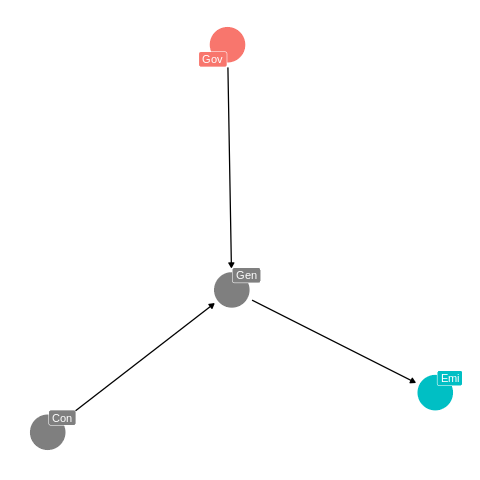

In [9]:
%%R
#Con is for Electricity Consumption
#Gen is for Electricity Generation
#Emi is for Carbon Emissions
#Gov is the ruling party

g <- dagitty('dag {
bb="-3.063,-2.267,3.223,3.543"
Con [pos="-2.540,-1.767"]
Emi [outcome,pos="2.700,-1.275"]
Gen [pos="-0.051,-0.000"]
Gov [exposure,pos="-0.109,3.043"]
Con -> Gen
Gen -> Emi
Gov -> Gen
}
'
)
ggdag::ggdag_status(g, text = FALSE, use_labels = "name") +
  guides(color = "none") +  # Turn off legend
  theme_dag()